## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [3]:
data[data.isnull().any(axis=1)]

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
23,Adelie,Torgersen,Yes,753,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368
34,Adelie,Dream,No,749,39.8,19.1,184.0,4650.0,MALE,NaN,NaN
44,Adelie,Torgersen,Yes,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Adelie,Dream,Yes,749,41.1,19.0,182.0,3425.0,MALE,NaN,NaN
108,Gentoo,Biscoe,Yes,733,47.3,15.3,222.0,5250.0,MALE,NaN,NaN
114,Adelie,Torgersen,Yes,746,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN
125,Adelie,Torgersen,Yes,753,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315
130,Gentoo,Biscoe,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,Gentoo,Biscoe,Yes,0,47.3,13.8,216.0,4725.0,NaN,8.25818,-26.23886
208,Adelie,Torgersen,Yes,747,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN


In [4]:
data.dropna(inplace=True)

In [5]:
# Найдем категориальные признаки

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Island               325 non-null    object 
 2   Clutch Completion    325 non-null    object 
 3   Date Egg             325 non-null    int64  
 4   Culmen Length (mm)   325 non-null    float64
 5   Culmen Depth (mm)    325 non-null    float64
 6   Flipper Length (mm)  325 non-null    float64
 7   Body Mass (g)        325 non-null    float64
 8   Sex                  325 non-null    object 
 9   Delta 15 N (o/oo)    325 non-null    float64
 10  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 30.5+ KB


Посмотрим на каждый из них по отдельности:

In [6]:
data["Island"].value_counts()

Island
Biscoe       163
Dream        119
Torgersen     43
Name: count, dtype: int64

In [7]:
# Будем использовать one-hot encoding, так как нельзя ввести никакой порядок на островах
# Не забываем избавиться от мультиколлинеарности

data = pd.get_dummies(data, columns=["Island"], drop_first=True)
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen
0,Chinstrap,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594,True,False
1,Chinstrap,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433,True,False
2,Gentoo,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829,False,False
3,Chinstrap,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984,True,False
4,Gentoo,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859,True,False
340,Adelie,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453,False,True
341,Adelie,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973,False,False
342,Gentoo,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352,False,False


In [8]:
data["Clutch Completion"].value_counts()

Clutch Completion
Yes    291
No      34
Name: count, dtype: int64

In [9]:
# Здесь ничего умного придумать не получится, всего 2 значения, просто переведем их в True/False

data["Clutch Completion"] = data["Clutch Completion"].map({"Yes": True, "No": False})
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen
0,Chinstrap,True,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594,True,False
1,Chinstrap,True,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433,True,False
2,Gentoo,True,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829,False,False
3,Chinstrap,True,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984,True,False
4,Gentoo,True,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,True,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859,True,False
340,Adelie,True,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453,False,True
341,Adelie,True,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973,False,False
342,Gentoo,True,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352,False,False


In [10]:
data["Sex"].value_counts()

Sex
FEMALE    163
MALE      161
.           1
Name: count, dtype: int64

Возникает **точка!**, причем одна. Будем считать такой объект пропуском.

In [11]:
# Для пола тоже можно использовать one-hot encoding

data = data[data["Sex"] != "."]
data = pd.get_dummies(data, columns=["Sex"], drop_first=True)
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Sex_MALE
0,Chinstrap,True,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True
1,Chinstrap,True,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,False
2,Gentoo,True,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,False
3,Chinstrap,True,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,False
4,Gentoo,True,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,True,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,False
340,Adelie,True,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,True
341,Adelie,True,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,False,False,False
342,Gentoo,True,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,False


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [12]:
from sklearn.preprocessing import OrdinalEncoder

target_enc = OrdinalEncoder(dtype=np.int32)
data["Species"] = target_enc.fit_transform(data[["Species"]])
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Sex_MALE
0,1,True,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True
1,1,True,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,False
2,2,True,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,False
3,1,True,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,False
4,2,True,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,True,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,False
340,0,True,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,True
341,0,True,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,False,False,False
342,2,True,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,False


In [13]:
X, y = data.drop(columns=["Species"]), data["Species"]
X

,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Sex_MALE
0,True,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True
1,True,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,False
2,True,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,False
3,True,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,False
4,True,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
339,True,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,False
340,True,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,True
341,True,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,False,False,False
342,True,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,False


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [14]:
data["Species"].value_counts()

Species
0    139
2    118
1     67
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

Использовать `stratify` здесь важно, так как классы-таргеты не сбалансированы, поэтому без указанного параметра, например, может возникнуть ситуация, когда `train` знает слишком много про один класс и слишком мало про другой.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [16]:
# Масштабируем признаки

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Sex_MALE
0,0.352673,0.105565,0.200986,-0.663925,0.992506,1.369099,-0.316044,-1.277250,-0.761853,-0.420813,1.054585
1,0.352673,0.067950,-0.454151,0.458112,-0.659446,-0.308796,0.211889,-0.532209,-0.761853,-0.420813,1.054585
2,-2.835489,0.081628,1.165494,-0.612923,1.710747,1.493387,-0.139409,-1.147178,-0.761853,-0.420813,1.054585
3,0.352673,-1.207509,0.947115,1.427144,0.130618,-0.184508,2.047530,1.375200,1.312590,-0.420813,1.054585
4,0.352673,0.030336,-0.290367,-0.204909,-1.018566,-1.054528,1.120509,1.557534,1.312590,-0.420813,-0.948240
...,...,...,...,...,...,...,...,...,...,...,...
221,-2.835489,1.268181,-0.162979,-0.255911,-1.018566,-1.613826,1.098249,0.844521,1.312590,-0.420813,-0.948240
222,0.352673,-1.197250,0.965313,-0.663925,1.064330,0.903017,-1.244897,-0.497826,-0.761853,-0.420813,1.054585
223,0.352673,0.064531,0.637744,0.611117,-0.443974,-0.433085,0.175264,1.294385,1.312590,-0.420813,-0.948240
224,0.352673,1.264762,-0.217574,-2.040970,0.992506,0.996233,-1.868873,0.360655,-0.761853,-0.420813,-0.948240


In [17]:
ks = (1, 3, 5, 10, 15, 25)
models = []

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("NN\tTrain\tTest")
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train[["Flipper Length (mm)", "Body Mass (g)"]], y_train)
    y_pred = model.predict(X_test[["Flipper Length (mm)", "Body Mass (g)"]])
    y_train_pred = model.predict(X_train[["Flipper Length (mm)", "Body Mass (g)"]])

    acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"{k}\t{train_acc:.2f}\t{acc:.2f}")

    models.append(model)

NN	Train	Test
1	0.98	0.80
3	0.88	0.80
5	0.85	0.85
10	0.81	0.81
15	0.82	0.82
25	0.81	0.84


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [19]:
from mlxtend.plotting import plot_decision_regions

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

6it [02:06, 21.05s/it]


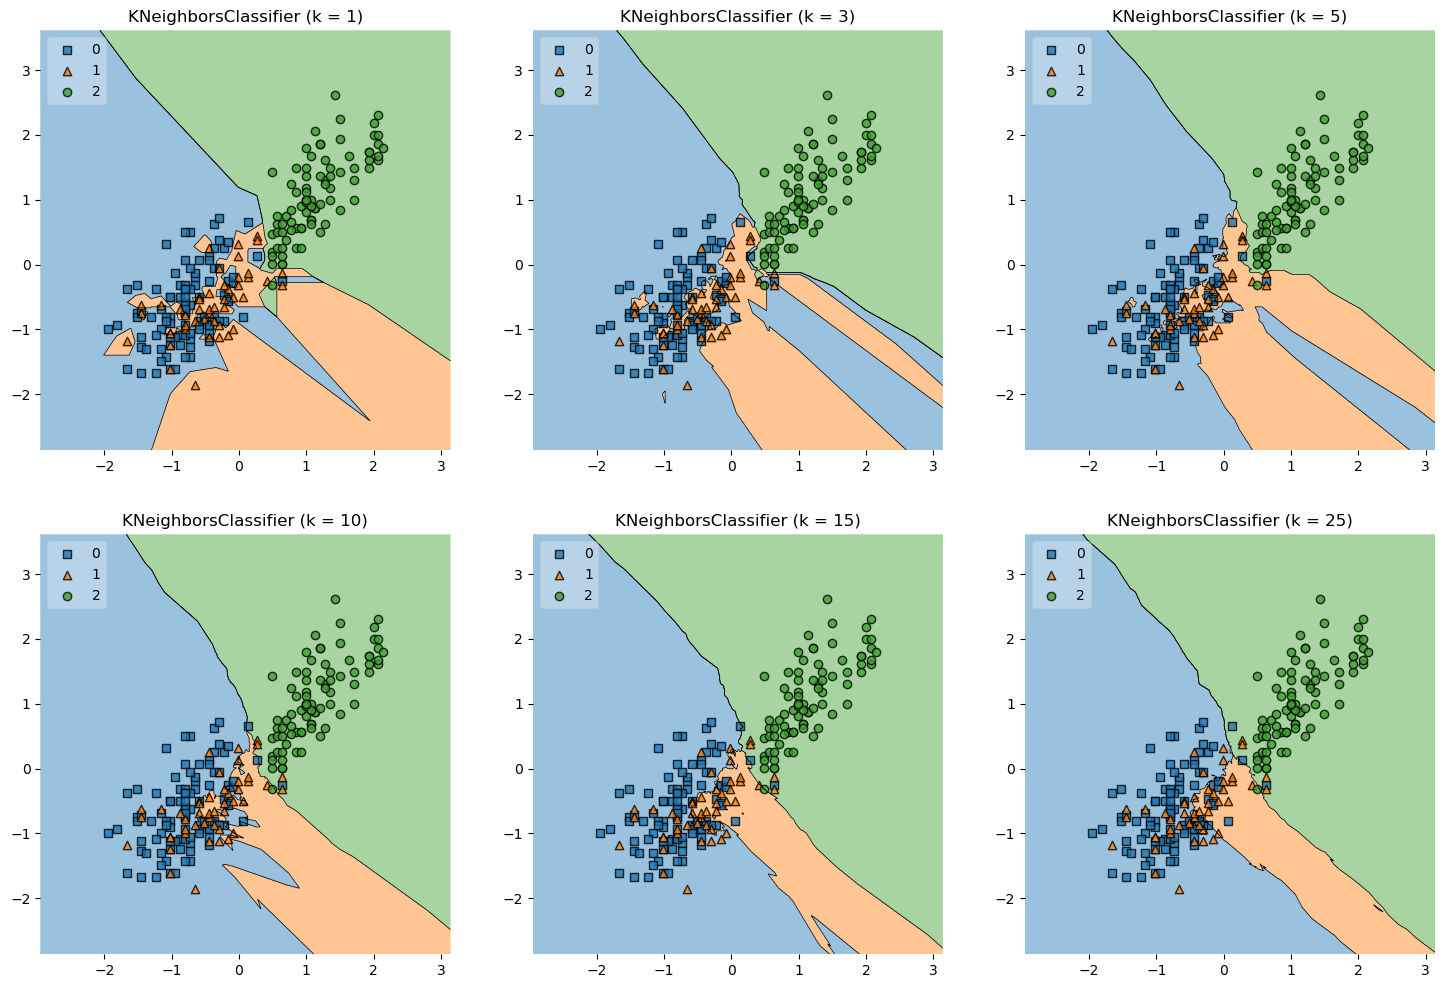

In [20]:
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18,12))

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

    for model, k, grd in tqdm(zip(models,
                                ks,
                                itertools.product([0, 1], [0, 1, 2]))):
        lab = f"KNeighborsClassifier (k = {k})"

        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X_train[["Flipper Length (mm)", "Body Mass (g)"]].to_numpy(), y=y_train.to_numpy(), clf=model, legend=2)
        plt.title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

По результатам задачи 1.3 оптимальное количество соседей равно 5 (Accuracy на тестовой выборке наибольшее).

Рассмотрим получившийся график при выбранном $k = 5$: Области ограничены кривыми, в отличие от, например, случая при $k = 1$. Сомнения может вносить "синий остров" в правом нижнем углу, которого не было на примере, на самом деле все дело в случайности, которая была применена при разбиении выборки на `train` и `test`.

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. При попадании в "большую" область одного класса шумового объекта другого класса, вокруг этого шумового объекта образуется "остров". Это явно говорит о **переобучении**.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

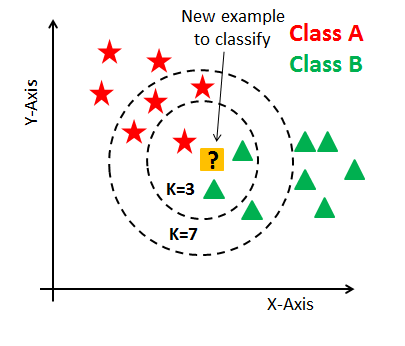

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [21]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      if k < 1:
        raise ValueError("k should be greater than 0")

      self.k = k
      self.X = None
      self.y = None

    def fit(self, X:np.array, y:np.array) -> None:
      if X.shape[0] != y.shape[0]:
        raise ValueError("X and y should have the same number of rows")
      if y.ndim != 1:
        raise ValueError("y should be 1-dimensional")

      self.X = X
      self.y = y

    def predict(self, X:np.array) -> np.array:
      if self.X is None or self.y is None:
        raise ValueError("Model is not fitted")
      if X.shape[1] != self.X.shape[1]:
        raise ValueError("Wrong number of features")
      
      distances = np.apply_along_axis(lambda x: np.linalg.norm(self.X - x, axis=1), 1, X)
      nearest = np.argsort(distances, axis=1)[:, :self.k]

      return np.apply_along_axis(lambda x: Counter(self.y[x]).most_common(1)[0][0], 1, nearest)
      

    # Assume x, y are coordinates of 2 points
    # Will not use to avoid loops... (and not tested in the task)
    def count_distance(self, x, y):
      return np.linalg.norm(x - y)


In [22]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [23]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [24]:
print("NN\t\tMyAccuracy\tSklearnAccuracy")
for k in range(1, 31):
    my_model = KNN(k=k)
    my_model.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = my_model.predict(X_test.to_numpy())

    sklearn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    sklearn_model.fit(X_train, y_train)
    y_sklearn_pred = sklearn_model.predict(X_test)

    print(f"{k}\t\t{accuracy_score(y_test, y_pred):.2f}\t\t{accuracy_score(y_test, y_sklearn_pred):.2f}")

NN		MyAccuracy	SklearnAccuracy
1		1.00		1.00
2		1.00		1.00
3		1.00		1.00
4		1.00		1.00
5		1.00		1.00
6		1.00		1.00
7		1.00		1.00
8		1.00		1.00
9		0.98		0.98
10		0.98		0.98
11		0.97		0.97
12		0.98		0.98
13		0.98		0.98
14		0.98		0.98
15		0.98		0.98
16		0.98		0.98
17		0.98		0.98
18		0.98		0.98
19		0.98		0.98
20		0.99		0.99
21		0.98		0.98
22		0.99		0.99
23		0.99		0.99
24		1.00		1.00
25		1.00		1.00
26		1.00		1.00
27		0.99		0.99
28		1.00		1.00
29		1.00		1.00
30		1.00		1.00


Лучший результат виден невооруженным глазом. На самом деле пугающий результат, но составители задания уверяют, что такой score выбивается с легкостью, поэтому будем считать, что все супер!

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [25]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [27]:
data["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [28]:
data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [29]:
data["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [30]:
data[data.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


В данных пропусков нет. Был единственный бессмысленный столбец с `id`, однако мы убили его сразу при чтении `csv` с помощью `index_col`.

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [31]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


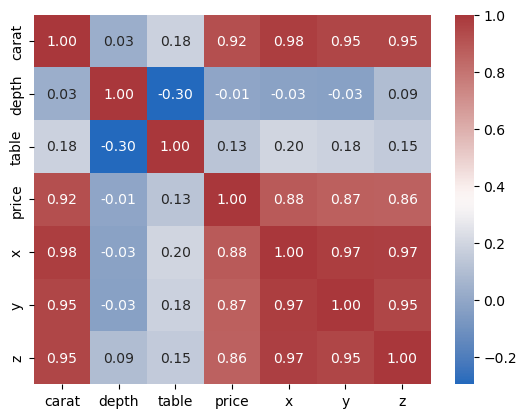

In [32]:
import seaborn as sns

sns.heatmap(data.corr(numeric_only=True), cmap="vlag", annot=True, fmt="0.2f");

Наибольшую корреляцию с таргетом имеет признак `carat` ($0.92$). Также можно отметить признаки `x`, `y`, `z`, корреляция которых с таргетом больше $0.8$.

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [33]:
data = pd.get_dummies(data, columns=["cut", "color", "clarity"], drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
5,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [34]:
X, y = data.drop(columns=["price"]), data["price"]
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
5,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,5.75,5.76,3.50,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.72,63.1,55.0,5.69,5.75,3.61,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53939,0.86,61.0,58.0,6.15,6.12,3.74,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=13371337)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 23), (16182, 23), (37758,), (16182,))

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [36]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.129561,0.031451,-1.100953,0.345463,0.360887,0.360699,-0.316808,1.228958,-0.584384,-0.540266,...,2.337112,-0.333588,-0.235498,-0.184885,-0.565993,2.197214,-0.42171,-0.541452,-0.269688,-0.321342
1,-1.093603,0.451347,-1.100953,-1.391763,-1.367965,-1.337497,-0.316808,1.228958,-0.584384,-0.540266,...,-0.427879,-0.333588,-0.235498,5.408771,-0.565993,-0.455122,-0.42171,-0.541452,-0.269688,-0.321342
2,-1.114692,0.591312,-0.652026,-1.427398,-1.412523,-1.366280,-0.316808,1.228958,-0.584384,-0.540266,...,-0.427879,-0.333588,-0.235498,-0.184885,-0.565993,-0.455122,-0.42171,-0.541452,-0.269688,3.111946
3,0.108472,-1.088270,1.143685,0.363281,0.316329,0.202392,-0.316808,-0.813697,1.711203,-0.540266,...,-0.427879,-0.333588,-0.235498,-0.184885,-0.565993,-0.455122,-0.42171,1.846884,-0.269688,-0.321342
4,2.575888,0.661294,0.694757,1.993601,2.045180,2.130852,-0.316808,-0.813697,-0.584384,1.850939,...,-0.427879,-0.333588,-0.235498,-0.184885,1.766806,-0.455122,-0.42171,-0.541452,-0.269688,-0.321342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.207864,-1.298218,-0.203098,0.015836,0.057892,-0.114221,3.156488,-0.813697,-0.584384,-0.540266,...,-0.427879,-0.333588,-0.235498,-0.184885,-0.565993,2.197214,-0.42171,-0.541452,-0.269688,-0.321342
37754,-0.692911,-0.668375,-0.652026,-0.652328,-0.628302,-0.704272,-0.316808,1.228958,-0.584384,-0.540266,...,-0.427879,-0.333588,-0.235498,-0.184885,1.766806,-0.455122,-0.42171,-0.541452,-0.269688,-0.321342
37755,-0.587466,0.031451,0.694757,-0.518695,-0.557009,-0.531574,-0.316808,-0.813697,1.711203,-0.540266,...,-0.427879,-0.333588,-0.235498,-0.184885,-0.565993,-0.455122,-0.42171,1.846884,-0.269688,-0.321342
37756,-1.030336,-0.248479,-0.203098,-1.231403,-1.145175,-1.207974,-0.316808,1.228958,-0.584384,-0.540266,...,-0.427879,-0.333588,-0.235498,-0.184885,-0.565993,-0.455122,-0.42171,1.846884,-0.269688,-0.321342


`transform` StandardScaler'a производится над каждым признаком следующим образом:

$$
\frac{x_i - m_i}{\sigma_i} = \frac{x_i}{\sigma_i} - \frac{m_i}{\sigma_i}
$$

где $m_i, \sigma_i$ — некоторые константы. Запишем изменение $x_i$:

$$
\frac{\alpha x_i}{\sigma_i} - \frac{m_i}{\sigma_i}
$$

Можно дать грубую оценку, что при изменении оригинального $i$-го признака в $\alpha$ раз масштабированный признак измениться в $\alpha \sigma_i$ раз.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

default_mse = mean_squared_error(y_test, y_pred)
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Test MSE: {default_mse:.2f}")

Train MSE: 1274851.00
Test MSE: 1284783.15


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [38]:
initial_weights = model.coef_
list(zip(X_train.columns[np.argsort(np.abs(model.coef_))[::-1]], np.sort(np.abs(model.coef_))[::-1]))

[('carat', 5280.247008075082),
 ('clarity_VS2', 1833.3691375698418),
 ('clarity_VS1', 1684.0743613404977),
 ('clarity_SI1', 1621.0647600824411),
 ('clarity_VVS2', 1478.0492358751628),
 ('clarity_VVS1', 1288.1085255550618),
 ('clarity_SI2', 1063.0552437192046),
 ('x', 1021.0396289488824),
 ('clarity_IF', 980.0184407446626),
 ('color_J', 525.1607597712888),
 ('color_I', 441.2607844728503),
 ('cut_Ideal', 414.11124524019675),
 ('color_H', 350.6068276558071),
 ('cut_Premium', 336.9592334220642),
 ('cut_Very Good', 307.79593468759265),
 ('color_G', 194.88967424049508),
 ('cut_Good', 176.2073135257309),
 ('z', 154.5009540295836),
 ('color_F', 99.28954514587869),
 ('color_E', 79.69160879364199),
 ('depth', 68.33802075595577),
 ('y', 67.92591378396638),
 ('table', 51.598215470327574)]

Из оценок **вещественных** переменных больше всего выделяются `carat` и `x`.

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [39]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=10)
model.fit(X_train, y_train)

regularization_res = pd.DataFrame({"initial_coef": initial_weights, "coef": model.coef_}, index=X_train.columns).sort_values(by="coef", ascending=False, key=np.abs)
regularization_res["delta"] = np.abs(regularization_res["initial_coef"]) - np.abs(regularization_res["coef"])
regularization_res

,initial_coef,coef,delta
carat,5280.247008,4777.046483,503.200525
clarity_VS2,1833.369138,1117.693579,715.675559
clarity_VS1,1684.074361,1064.929013,619.145349
clarity_VVS2,1478.049236,976.829601,501.219635
clarity_SI1,1621.064760,888.501506,732.563255
clarity_VVS1,1288.108526,854.214436,433.894089
clarity_IF,980.018441,666.708158,313.310283
x,-1021.039629,-494.437112,526.602516
color_J,-525.160760,-464.731620,60.429140
clarity_SI2,1063.055244,425.020959,638.034285


In [40]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=10)
model.fit(X_train, y_train)

regularization_res = pd.DataFrame({"initial_coef": initial_weights, "coef": model.coef_}, index=X_train.columns).sort_values(by="coef", ascending=False, key=np.abs)
regularization_res["delta"] = np.abs(regularization_res["initial_coef"]) - np.abs(regularization_res["coef"])
regularization_res

,initial_coef,coef,delta
carat,5280.247008,5241.856240,38.390768
clarity_VS2,1833.369138,1803.141577,30.227561
clarity_VS1,1684.074361,1658.122875,25.951487
clarity_SI1,1621.064760,1589.923376,31.141384
clarity_VVS2,1478.049236,1457.221357,20.827879
clarity_VVS1,1288.108526,1270.307848,17.800677
clarity_SI2,1063.055244,1036.392223,26.663021
clarity_IF,980.018441,967.330147,12.688293
x,-1021.039629,-962.432185,58.607444
color_J,-525.160760,-523.831499,1.329261


Оба метода регуляризации не очень сильно уменьшили веса, однако стоит отметить, что `Lasso` справилось лучше. Это может означать то, что в изначальной регрессии проблема мультиколлинеарности присутствовала, хотя и не была сильно выражена.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [41]:
alphas = (0.1, 1, 10, 100, 200)

lasso_norms = []
ridge_norms = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(model.coef_))

    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(model.coef_))

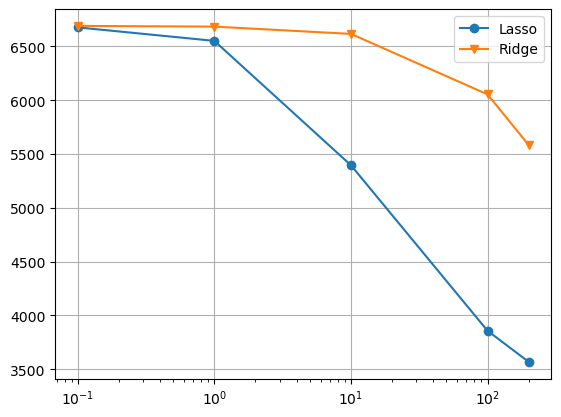

In [42]:
fig, ax = plt.subplots()
ax.plot(alphas, lasso_norms, label="Lasso", marker='o')
ax.plot(alphas, ridge_norms, label="Ridge", marker='v')

ax.grid()
ax.legend()
ax.set_xscale('log')

В нашем случае `Lasso` метод сильнее снижает норму коэффициентов.

`Lasso` регуляризация имеет очень хорошее свойство — её применение приводит к тому, что у признаков, которые не оказывают большого влияния на ответ, вес в результате оптимизации получается равным 0. Да и в целом, как можно заметить по графику и сравнению коэффициентов выше, `Lasso` сильнее уменьшает коэффициенты. Именно по этим причинам `Lasso` часто используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [43]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5, alphas=alphas, random_state=228, max_iter=10000) # doesn't converge without default max_iter=1000
model.fit(X_train, y_train)
model.mse_path_

array([[2064702.17822506, 2315032.84204303, 2129066.43651123,
        2143248.84409153, 2142252.35333303],
       [1720761.45871379, 1958891.75247743, 1743721.8619626 ,
        1761758.38260712, 1749809.40895188],
       [1294204.88613242, 1529082.10521193, 1285485.13307681,
        1303793.09231242, 1296851.94273555],
       [1222483.17263943, 1453114.65339116, 1232336.92557976,
        1249191.78832044, 1254025.06809364],
       [1220453.41366613, 1450006.10997578, 1240526.89843335,
        1250269.82927399, 1254938.43704824]])

In [44]:
pd.DataFrame({"alpha": model.alphas_, "mse": model.mse_path_.mean(axis=1)}).sort_values(by="mse")

,alpha,mse
3,1.0,1.282230e+06
4,0.1,1.283239e+06
2,10.0,1.341883e+06
1,100.0,1.786989e+06
0,200.0,2.158861e+06


Наибольшее качество дает модель при $\alpha=1.0$, совсем рядом стоит значение MSE при $\alpha=0.1$, для дальнейшего анализа выберем $\alpha=1.0$.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [45]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

pd.DataFrame({"coef": model.coef_}, index=X_train.columns).sort_values(by="coef", ascending=False, key=np.abs)

,coef
carat,5234.924954
clarity_VS2,1761.666906
clarity_VS1,1622.166287
clarity_SI1,1547.742212
clarity_VVS2,1427.816426
clarity_VVS1,1244.555368
clarity_SI2,999.117223
clarity_IF,948.603983
x,-938.787857
color_J,-519.168903


#### Все признаки

Вспомним:

`price` price in US dollars (\$326--\$18,823)

`carat` weight of the diamond (0.2--5.01)

`cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color` diamond colour, from J (worst) to D (best)

`clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x` length in mm (0--10.74)

`y` width in mm (0--58.9)

`z` depth in mm (0--31.8)

`depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

`table` width of top of diamond relative to widest point (43--95)

![brilliant parameters](https://www.grandjewelers.com/wp-content/uploads/diamond-chart.jpg)

#### Неинформативные признаки

- Ширина бриллианта (настолько незначительный признак, что он даже занулился) — возможная причина может заключаться в том, что этот параметр можно однозначно определить остальные параметры размера (см. формулу для `depth`). Также, возможно, что этот параметр в принципе не особо важен для определения цены бриллианта.
- Ширина верхушки бриллианта — вероятная причина та же, что и для общей ширины.
- Огранка — хоть и не самый неинформативный признак из всех, имеет достаточно малые коэффициенты. Возможная причина заключается в том, что можно проводить повторную огранку бриллиантов.

#### Информативные признаки

- Карат — вес бриллианта. Причина здесь очевидна: чем больше вес, тем больше сам бриллиант, смотрится массивнее, а значит и стоит дороже.
- Чистота бриллианта. Чем чище бриллиант, тем дороже он стоит.
- Длина бриллианта. Возможно, чем большая длина бриллианта нарушает «правильные» пропорции бриллианта, следовательно его вид, следовательно его стоимость.
- Цвет — оказывает несравнимое с остальными информативными признаками влияние, однако тоже следует учитывать его учитывать. «Плохие» цвета негативно влияют на стоимость бриллианта.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [46]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred)
print("Lasso MSE:", best_mse)
print("Linreg without regularization MSE:", default_mse)
print("Delta:", default_mse - best_mse)

Lasso MSE: 1283011.9535468318
Linreg without regularization MSE: 1284783.1484790344
Delta: 1771.1949322025757


Видим маленькую победу! У нас получилось уменьшить `MSE`, хоть и не на очень много. Причина — мы исключили мультиколлинеарность добавив регуляризацию. 